# Configuration

In [44]:
import os
import pandas             as pd
import numpy              as np
import seaborn            as sns


from sklearn.linear_model       import LogisticRegression
from sklearn.model_selection    import train_test_split
from sklearn.metrics            import classification_report
from matplotlib                 import pyplot as plt 
from IPython.core.display       import display, HTML

In [3]:
# -------------------------------------------
# Jupyter notebook Settings
# -------------------------------------------
display( HTML( '<style>.container { width:95% !important; }</style>' ) )
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option( 'display.expand_frame_repr', False )

# -------------------------------------------
# Plotting Settings
# -------------------------------------------
plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams['font.size'] = 24
sns.set()
sns.set_style("whitegrid")
sns.despine(right = True)
pd.options.display.float_format = '{:.2f}'.format

<Figure size 720x720 with 0 Axes>

# Getting Dataset

In [4]:
df_raw = pd.read_csv('../csv/my_music_dataset.csv')
df_raw = df_raw.drop(columns=['Unnamed: 0'])
df_raw.head()

,id,url,name,artist,album,explicit,popularity,duration_ms,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,label
0,3eFepXGITXNDXXHUNqouxi,https://open.spotify.com/track/3eFepXGITXNDXXH...,Shake Me Down,Cage The Elephant,Thank You Happy Birthday,False,54,211373,9,1,4,0.46,0.61,0.03,0.00,0.00,0.07,0.13,105.11,0
1,51pQ7vY7WXzxskwloaeqyj,https://open.spotify.com/track/51pQ7vY7WXzxskw...,Stairway to Heaven - 1990 Remaster,Led Zeppelin,Led Zeppelin IV,False,67,478173,7,1,4,0.35,0.34,0.03,0.57,0.01,0.18,0.21,84.20,0
2,6QHGyXR0m3PDStlyHN8dYK,https://open.spotify.com/track/6QHGyXR0m3PDStl...,Stay Alive,José González,Stay Alive (From The Secret Life Of Walter Mitty),False,16,266906,6,1,4,0.72,0.30,0.04,0.70,0.14,0.09,0.33,130.00,0
3,3usVf6rhG6vDjcodeavHde,https://open.spotify.com/track/3usVf6rhG6vDjco...,Sozinho - Live In Brazil / 1998,Caetano Veloso,Prenda Minha (Live),False,1,190496,11,0,3,0.48,0.28,0.19,0.63,0.00,0.91,0.53,83.74,0
4,0sTr29gwWE4wIxjMLytsOu,https://open.spotify.com/track/0sTr29gwWE4wIxj...,If You Believe,Sasha,Greatest Hits,False,42,239973,5,1,1,0.37,0.52,0.04,0.12,0.00,0.11,0.48,82.51,0


# Exploration

In [182]:
df_0 = df_raw.loc[df_raw['label'] == 0].copy()
df_0.describe()

,popularity,duration_ms,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,label
count,556.00,556.00,556.00,556.00,556.00,556.00,556.00,556.00,556.00,556.00,556.00,556.00,556.00,556.00
mean,42.38,219743.38,5.13,0.65,3.88,0.59,0.44,0.07,0.54,0.05,0.17,0.45,114.21,0.00
std,22.84,59538.90,3.54,0.48,0.45,0.15,0.19,0.08,0.30,0.17,0.14,0.22,28.38,0.00
min,0.00,53454.00,0.00,0.00,1.00,0.16,0.01,0.02,0.00,0.00,0.03,0.04,58.10,0.00
25%,28.00,181549.50,2.00,0.00,4.00,0.50,0.31,0.03,0.27,0.00,0.10,0.29,90.36,0.00
50%,48.00,215839.50,5.00,1.00,4.00,0.59,0.42,0.04,0.57,0.00,0.11,0.43,112.06,0.00
75%,59.00,255551.75,8.00,1.00,4.00,0.70,0.57,0.06,0.80,0.01,0.18,0.61,131.32,0.00
max,86.00,478173.00,11.00,1.00,5.00,0.93,0.91,0.57,0.99,0.97,0.98,0.97,204.03,0.00


In [183]:
df_1 = df_raw.loc[df_raw['label'] == 1].copy()
df_1.describe()

,popularity,duration_ms,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,label
count,1358.00,1358.00,1358.00,1358.00,1358.00,1358.00,1358.00,1358.00,1358.00,1358.00,1358.00,1358.00,1358.00,1358.00
mean,41.58,224520.05,5.48,0.51,3.96,0.66,0.66,0.10,0.25,0.02,0.20,0.60,118.55,1.00
std,24.40,49038.20,3.63,0.50,0.26,0.14,0.17,0.11,0.25,0.11,0.18,0.22,27.40,0.00
min,0.00,97000.00,0.00,0.00,1.00,0.20,0.06,0.02,0.00,0.00,0.02,0.04,54.75,1.00
25%,21.25,192095.50,2.00,0.00,4.00,0.57,0.53,0.04,0.04,0.00,0.09,0.44,96.01,1.00
50%,47.00,217797.50,6.00,1.00,4.00,0.67,0.67,0.06,0.16,0.00,0.13,0.61,117.97,1.00
75%,61.00,251139.75,9.00,1.00,4.00,0.76,0.79,0.13,0.41,0.00,0.25,0.77,134.01,1.00
max,93.00,505482.00,11.00,1.00,5.00,0.98,0.99,0.87,0.97,0.97,0.98,0.98,212.14,1.00


In [184]:
# Defining Features
features = [
#     "duration_ms",
#     "key",
#     "mode",
#     "time_signature",
    "danceability",
    "energy",
#     "speechiness",
    "acousticness",
#     "instrumentalness",
    "liveness",
    "valence",
    "tempo"
]

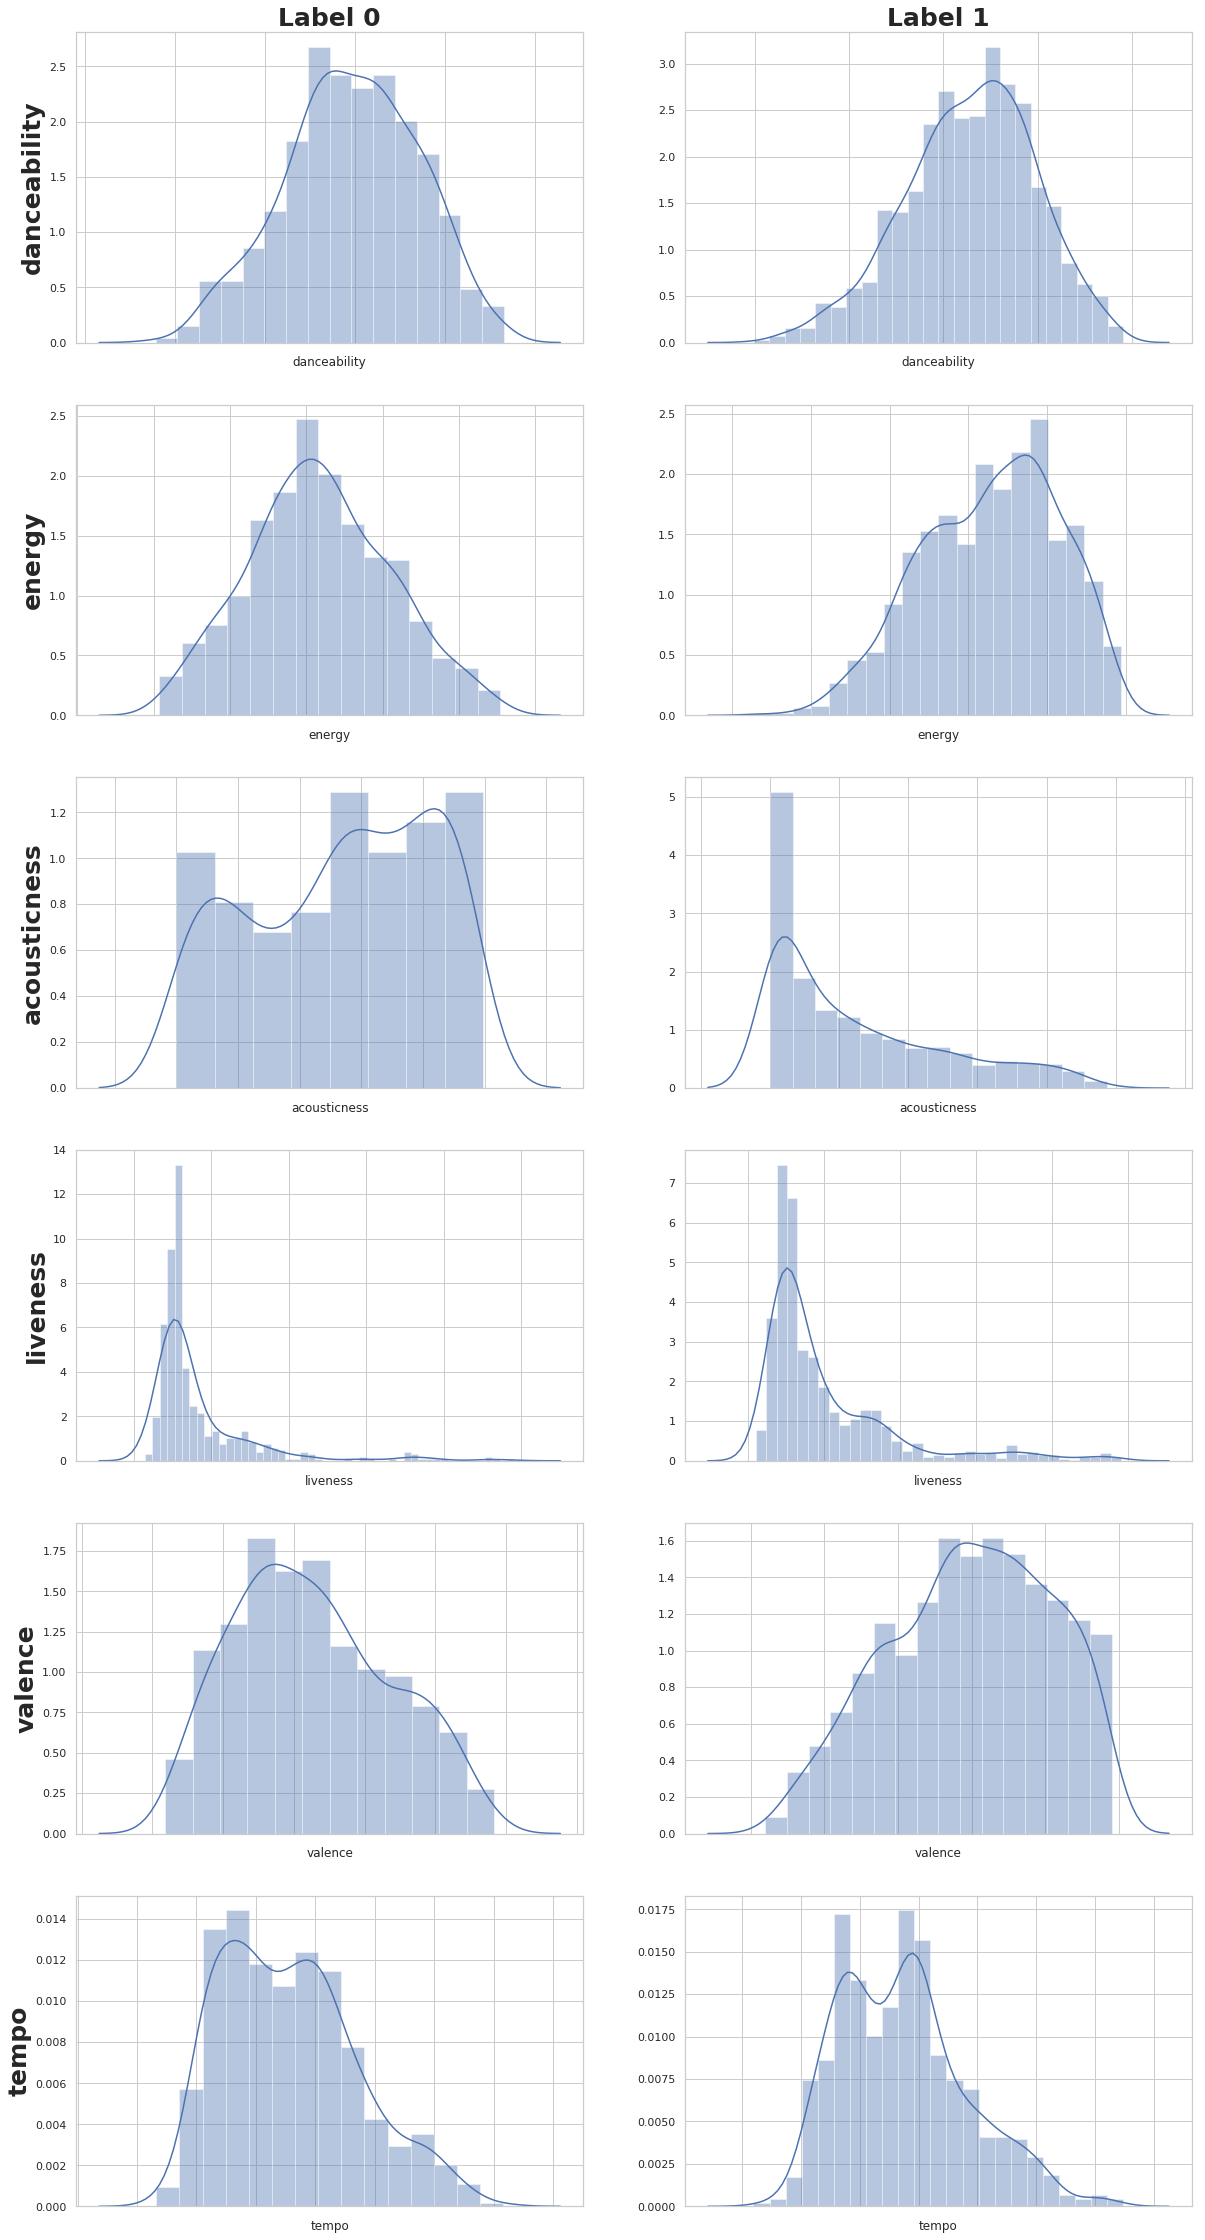

In [185]:
# Setting subplots
fig, axs = plt.subplots(len(features), 2, figsize=(20, 40))

# Plotting
axs[0,0].set_title('Label 0', fontweight="bold", size=25)
axs[0,1].set_title('Label 1', fontweight="bold", size=25)
for index, col in enumerate(features):
    axs[index,0].set_ylabel(col, fontweight="bold", fontsize=25)
    sns.distplot(df_0[col], ax=axs[index,0])
    sns.distplot(df_1[col], ax=axs[index,1])
    axs[index,0].set_xticklabels([])
    axs[index,1].set_xticklabels([])
    
plt.show()

# Logistic Regression

In [186]:
# Getting Dataset
df_features_entire = df_raw[features].copy()
df_labels_entire = df_raw['label'].copy()

# Splitting Dataset
df_features_train, df_features_test, df_labels_train, df_labels_test = train_test_split(df_features_entire, df_labels_entire, test_size=0.2, random_state=0)

# Training Model
lg = LogisticRegression()
lg.fit(df_features_train, df_labels_train)

# Predicting
prediction = lg.predict(df_features_test)

# Printing Classification Report
print(classification_report(df_labels_test, prediction))

              precision    recall  f1-score   support

           0       0.83      0.46      0.59       125
           1       0.79      0.95      0.86       258

   micro avg       0.79      0.79      0.79       383
   macro avg       0.81      0.71      0.73       383
weighted avg       0.80      0.79      0.77       383

